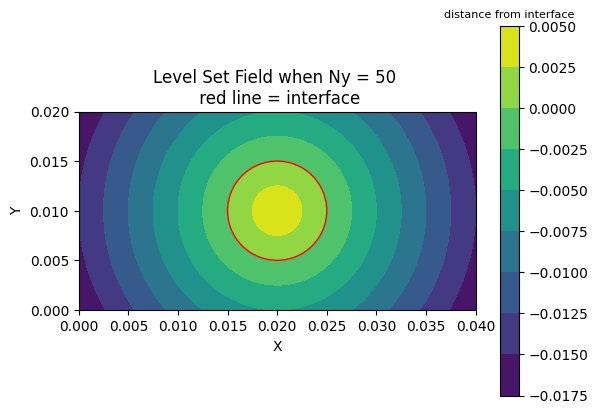

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt
import array

# constants 
nu = 1e-6
mu = 1e-3
rho = 1e3
gradP = -0.375

# building the domain
L1 = 0.04 # x
L2 = 0.02 # y

Ny = 50
Nx = int(Ny*2) 
h = L1/Nx
 
#droplet info
rad = L2/4
xd = 0.02
yd = 0.01
  
def levelset (x,y):
    return rad - math.sqrt( (x-xd)**2 + (y - yd)**2 )  

xlist = np.linspace(0,L1,Nx+2)
ylist = np.linspace(0,L2, Ny)   # we crop out two rows of nodes because those are the ghost nodes that give us no slip BC
level_set_field = np.zeros([len(xlist), len(ylist)])
grid_x = np.zeros([len(xlist),len(ylist)]) 
grid_y = np.zeros([len(xlist), len(ylist)])
for i in range(0,len(xlist)):
    for j in range(0,len(ylist)):
        grid_y[i,:] = ylist
        grid_x[:,j] = xlist
        level_set_field[i,j] = levelset(grid_x[i,j], grid_y[i,j]) 

figure, axes = plt.subplots()
plt.contourf(grid_x, grid_y, level_set_field, 10)
plt.title('Level Set Field when Ny = 50 \n red line = interface') 
legend=plt.colorbar() 
legend.ax.set_title('distance from interface',fontsize=8) 
plt.xlabel('X') 
plt.ylabel('Y') 

interface = plt.Circle((xd, yd), rad, color ='red', fill = False)
axes.add_artist(interface)
plt.axis('scaled')
plt.show()


